# 拉勾网数据分析岗位分析

## 背景

### 目的
基于拉勾网数据分析岗位招聘数据，获取数据分析岗位企业概况，职业技能要求，以及薪资待遇。为求职者职业规划以及求职做准备。

### 数据来源
利用python爬虫抓取拉勾网2018年3月12日到4月12日全国42座城市数据分析岗位招聘数据，经预处理后共计2983条。

### 特别说明
本次数据源完全来自拉勾网，但由于拉勾网本身为互联网行业招聘平台，所以分析结果以及结论仅与互联网相关企业相关，不能作为全行业参考标准，同时由于数据来源为非官方普查数据库且数据规模有限，所以结果与实际情况存在一定偏差。

## 数据分析

### 数据加载

In [1]:
import numpy as np
import pandas as pd
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
import jieba.posseg as pseg
from wordcloud import WordCloud

In [2]:
sns.set(style='white')
plt.rc('font', family='SimHei', size=10)

In [3]:
df = pd.read_csv('.\data\Lagou_Data.csv',encoding="gbk")

### 1 行业概况

#### 1.1 数据分析岗位主要需求行业

In [4]:
df['industryField'] = df['industryField'].str.replace('、',',').str.replace(' ',',')
industryField = df['industryField'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df_industryField= industryField.groupby(industryField.values).count().reset_index()
df_industryField.columns=['industryField','number']
df_industryField = df_industryField[~df_industryField['industryField'].isin(['移动互联网','','招聘','分类信息'])].sort_values('number',ascending=False)

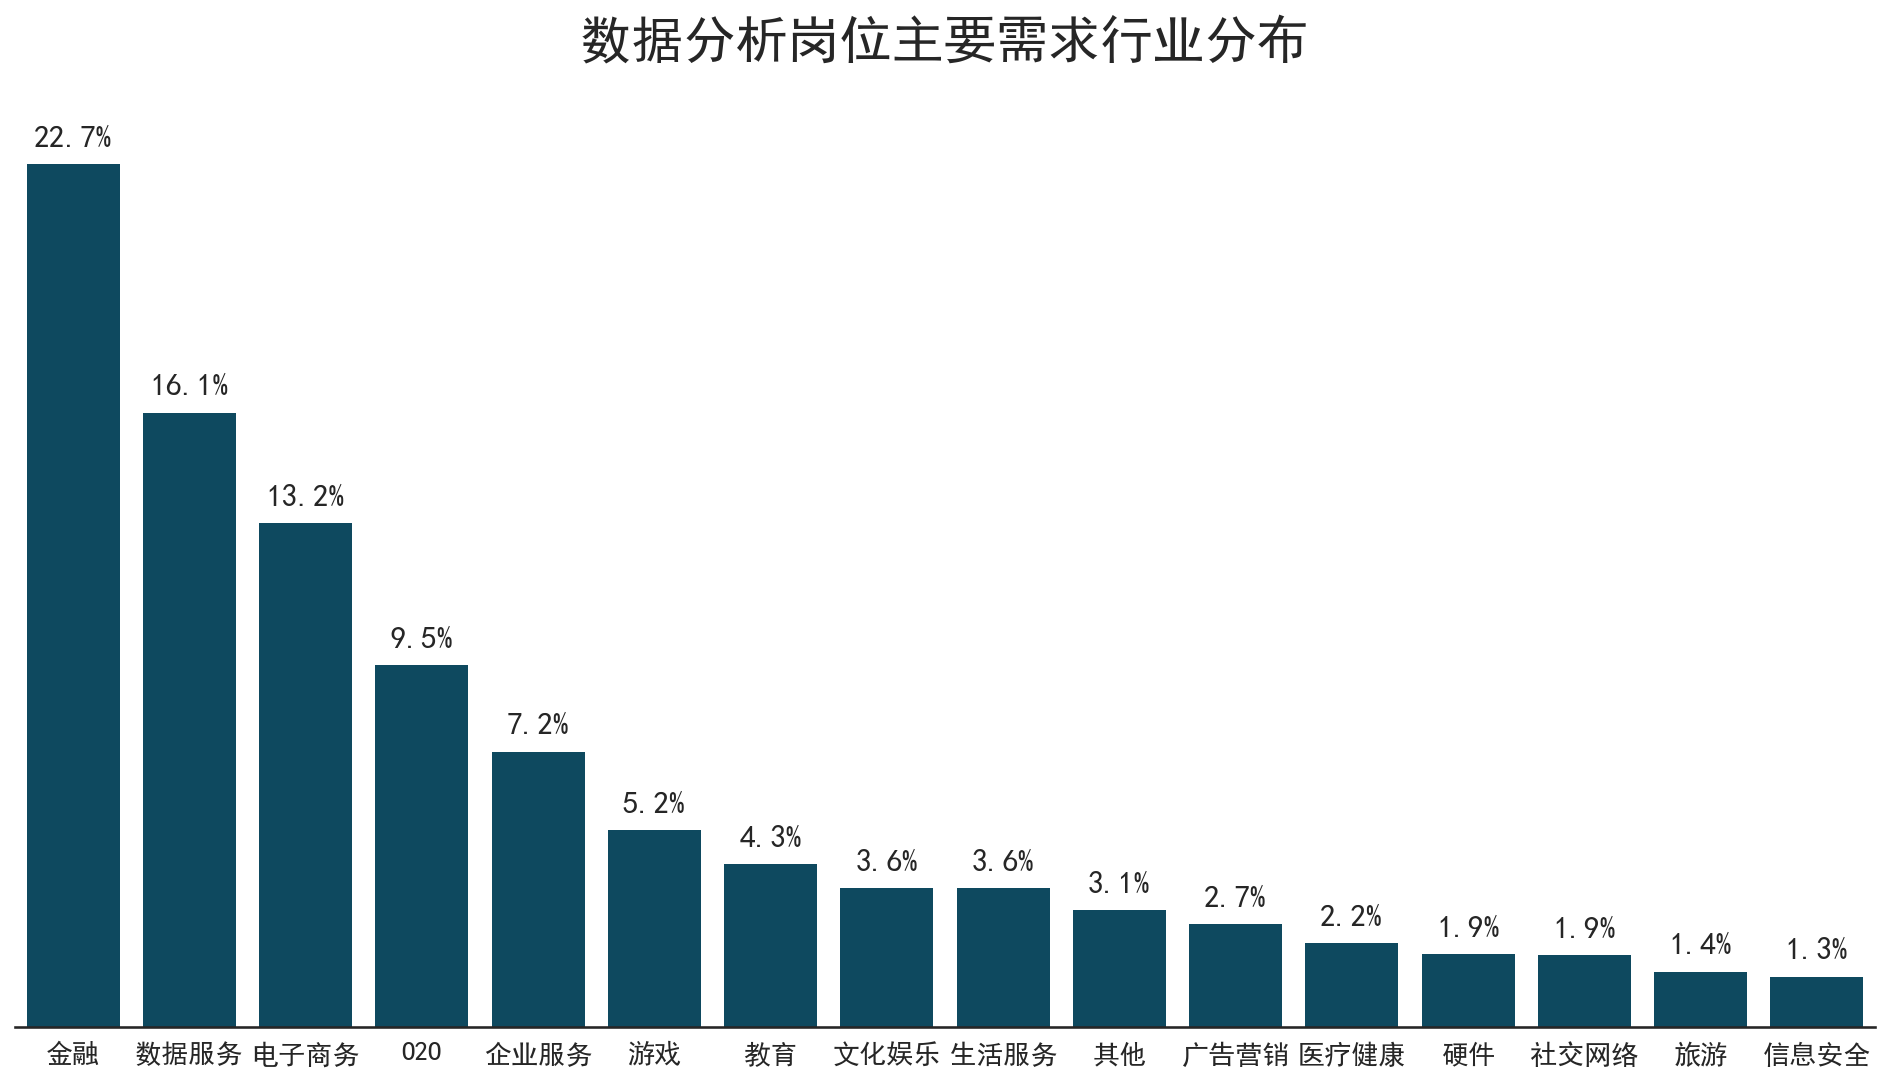

In [5]:
fig = plt.figure(figsize=(16,8),dpi=150)
sns.barplot('industryField','number',data=df_industryField,color='#004f6d')
x = np.arange(len(df_industryField))
y = df_industryField.number
for a,b in zip(x,y):
    plt.text(a, b+10, '{:.1f}%'.format(b/sum(df_industryField.number)*100), ha='center', va= 'bottom',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.title('数据分析岗位主要需求行业分布\n',size=25)
sns.despine(left=True)
plt.show()

从行业需求分布来看，金融领域处于第一位，人才需求占比达22.7%，其次为数据服务、电子商务以及O2O。

#### 1.2 数据分析岗位需求量最高的十座城市

In [6]:
grouped_city =df.groupby('city')['positionId'].count().sort_values(ascending=False)
top10 = list(grouped_city.index[:10])

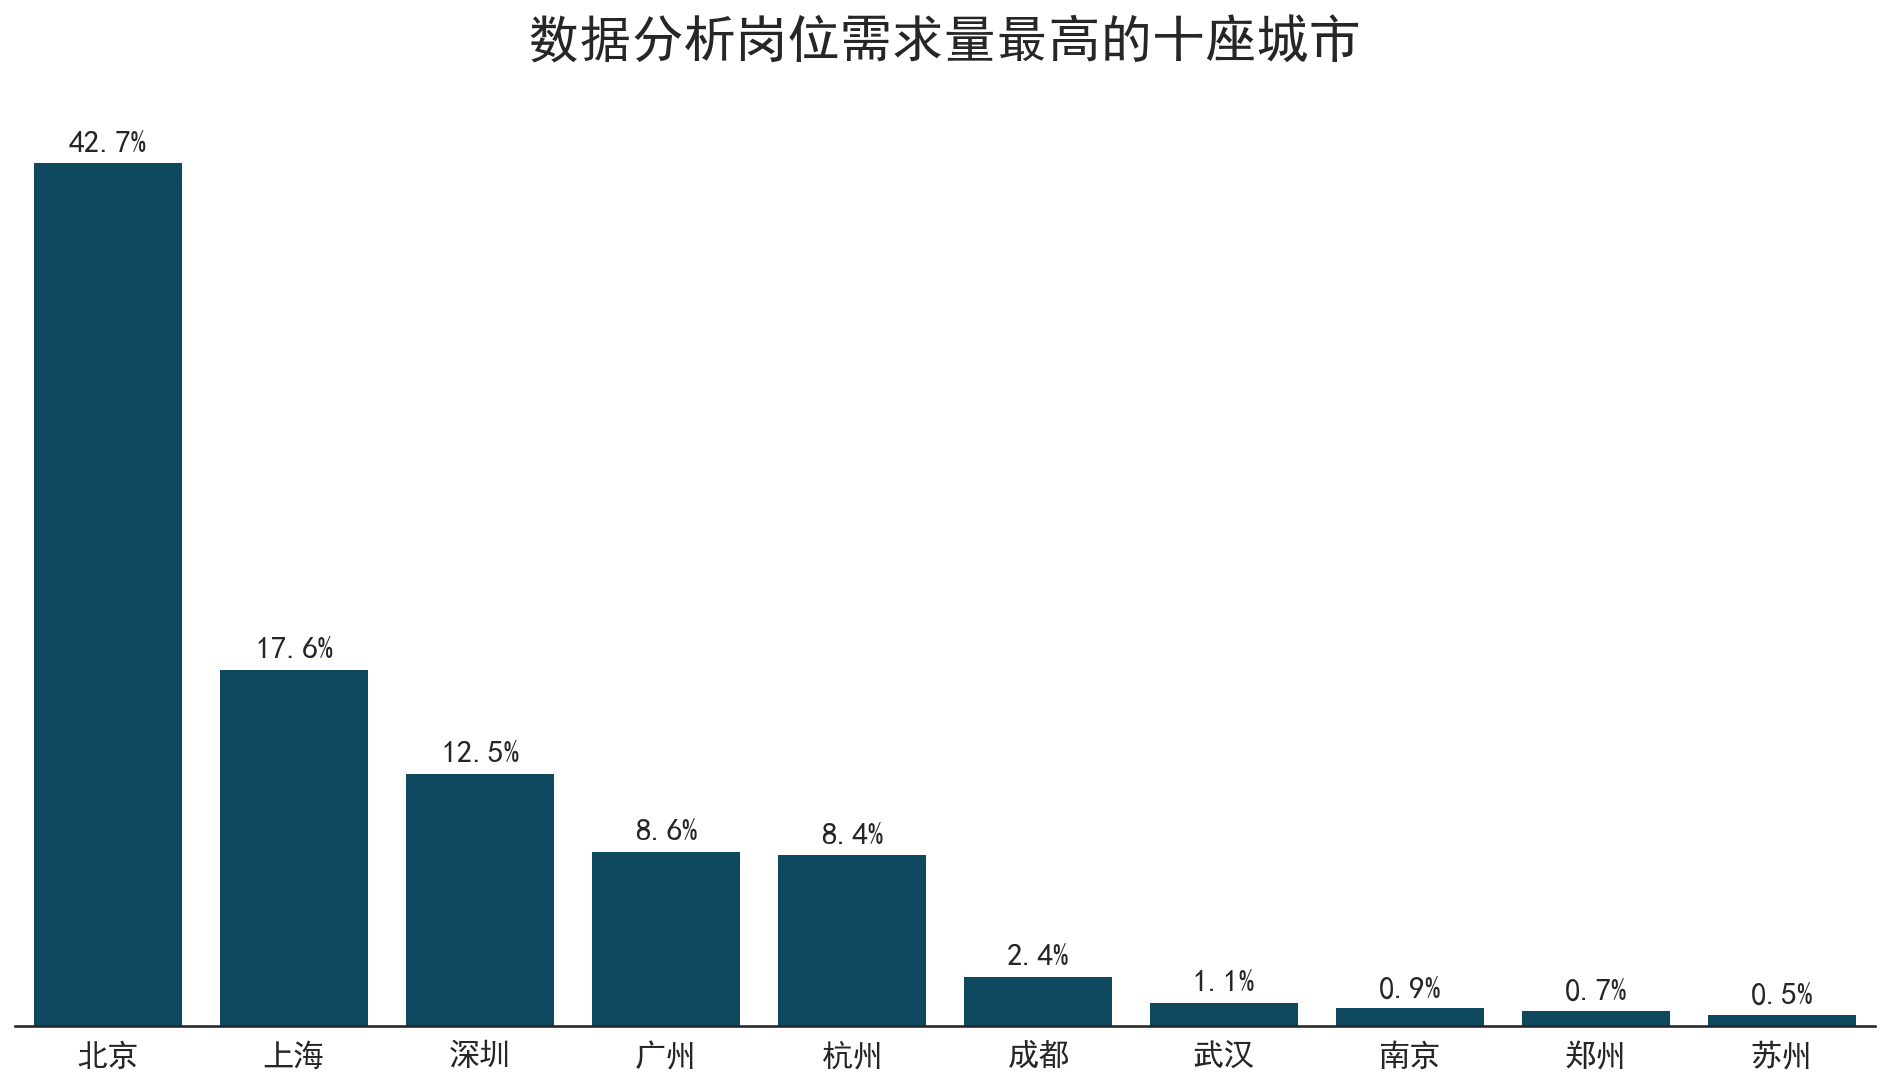

In [7]:
fig = plt.figure(figsize=(16,8),dpi=150)
sns.barplot(grouped_city.index,grouped_city,order=top10,color='#004f6d')
x = np.arange(len(top10))
y = grouped_city.values
for a,b in zip(x,y):
    plt.text(a, b+10, '{:.1f}%'.format(b/sum(grouped_city)*100), ha='center', va= 'bottom',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
plt.xlabel('',fontsize=15)
plt.ylabel('')
plt.title('数据分析岗位需求量最高的十座城市\n',size=25)
sns.despine(left=True)
plt.show()

从城市分布上看，互联网行业人才需求高度集中，北京、上海、深圳、广州、杭州这五大城市的人才需求占到了全国的近90%，其中北京身为互联网行业大本营，人才需求稳居首位，占比达42.7%。

#### 1.3 数据分析岗位招聘企业融资情况

In [8]:
financeStage_data =df.groupby('financeStage')['positionId'].count().reindex([ '未融资','天使轮', 'A轮',  'B轮', 'C轮', 'D轮及以上','上市公司', '不需要融资'])
#financeStage_data 

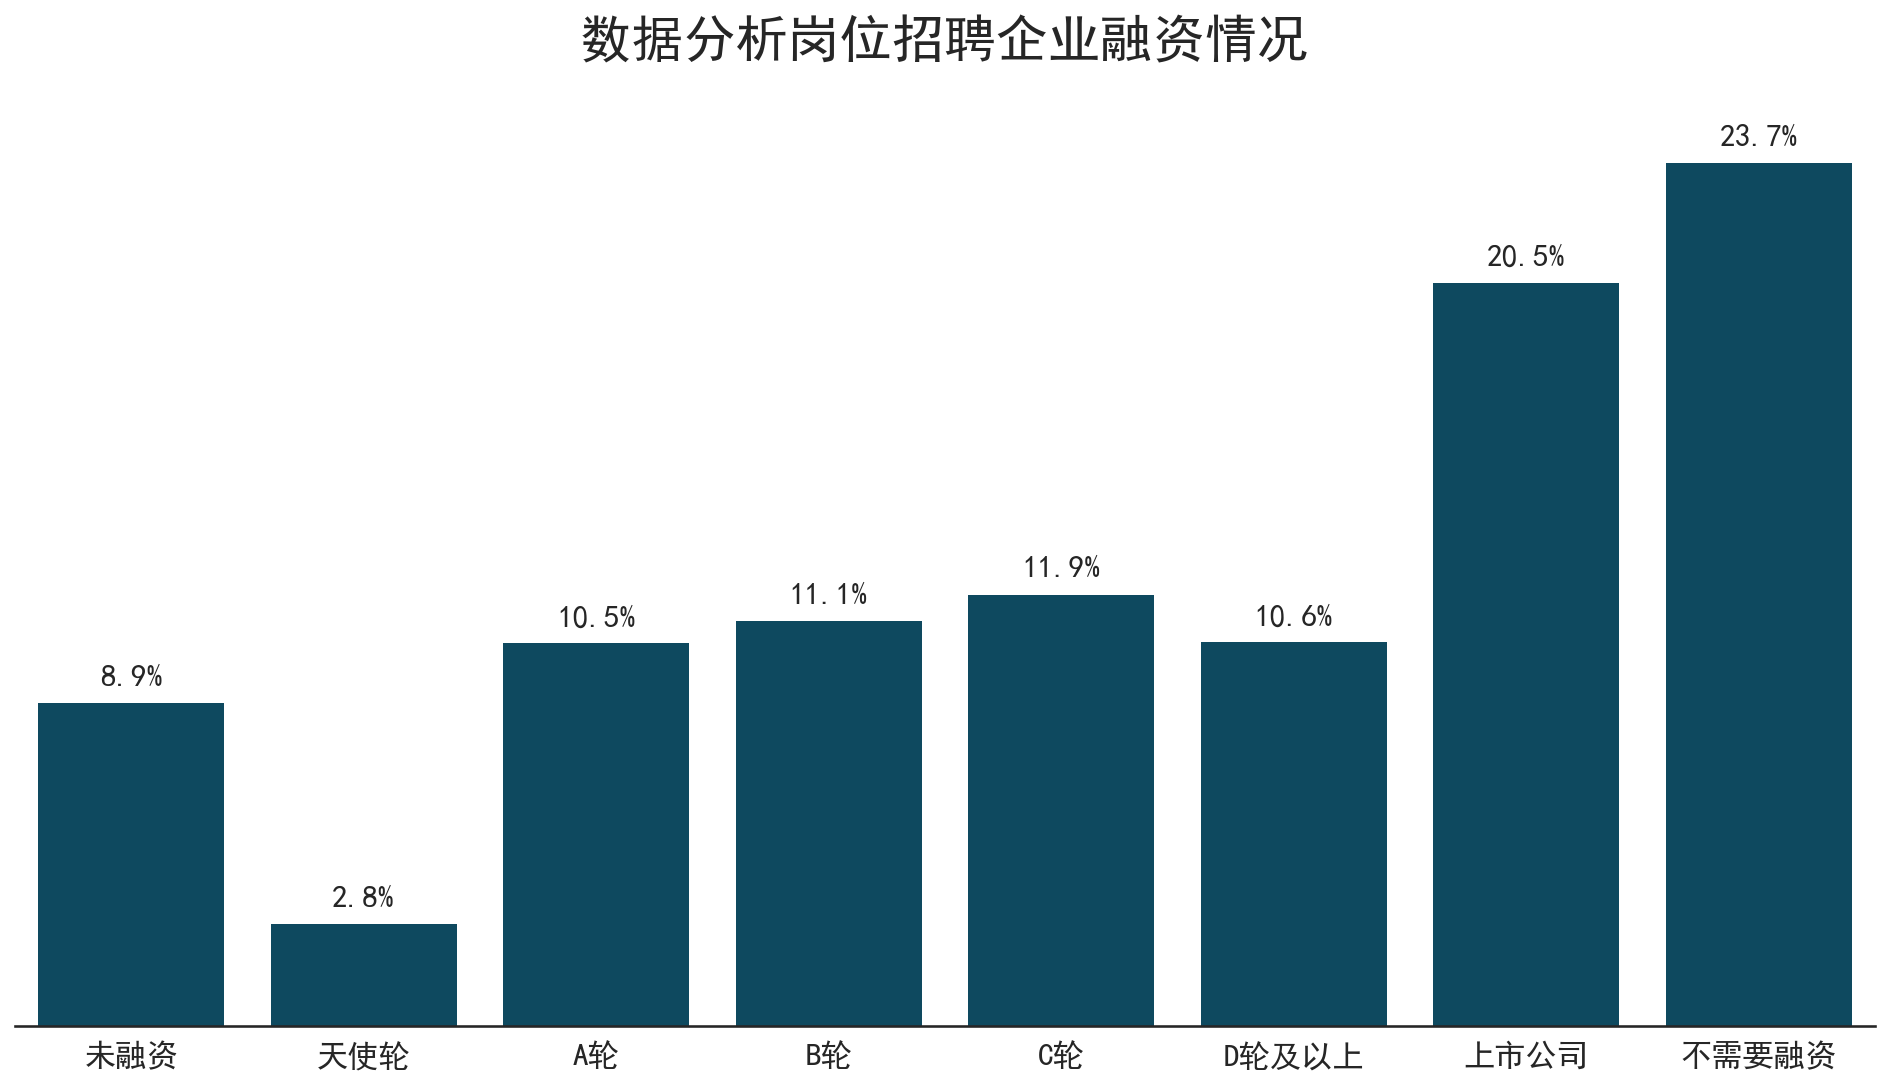

In [9]:
fig = plt.figure(figsize=(16,8),dpi=150)
sns.barplot(financeStage_data.index,financeStage_data,color='#004f6d')
x = np.arange(len(financeStage_data))
y = financeStage_data.values
for a,b in zip(x,y):
    plt.text(a, b+10, '{:.1f}%'.format(b/sum(financeStage_data)*100), ha='center', va= 'bottom',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.title('数据分析岗位招聘企业融资情况\n',size=25)
sns.despine(left=True)
plt.show()

按融资阶段划分，上市以及不需要融资的企业人才占比分别达到20.5%和23.7%。

#### 1.4 数据分析岗位招聘企业规模分布

In [10]:
companySize_data =df.groupby('companySize')['positionId'].count().sort_values()

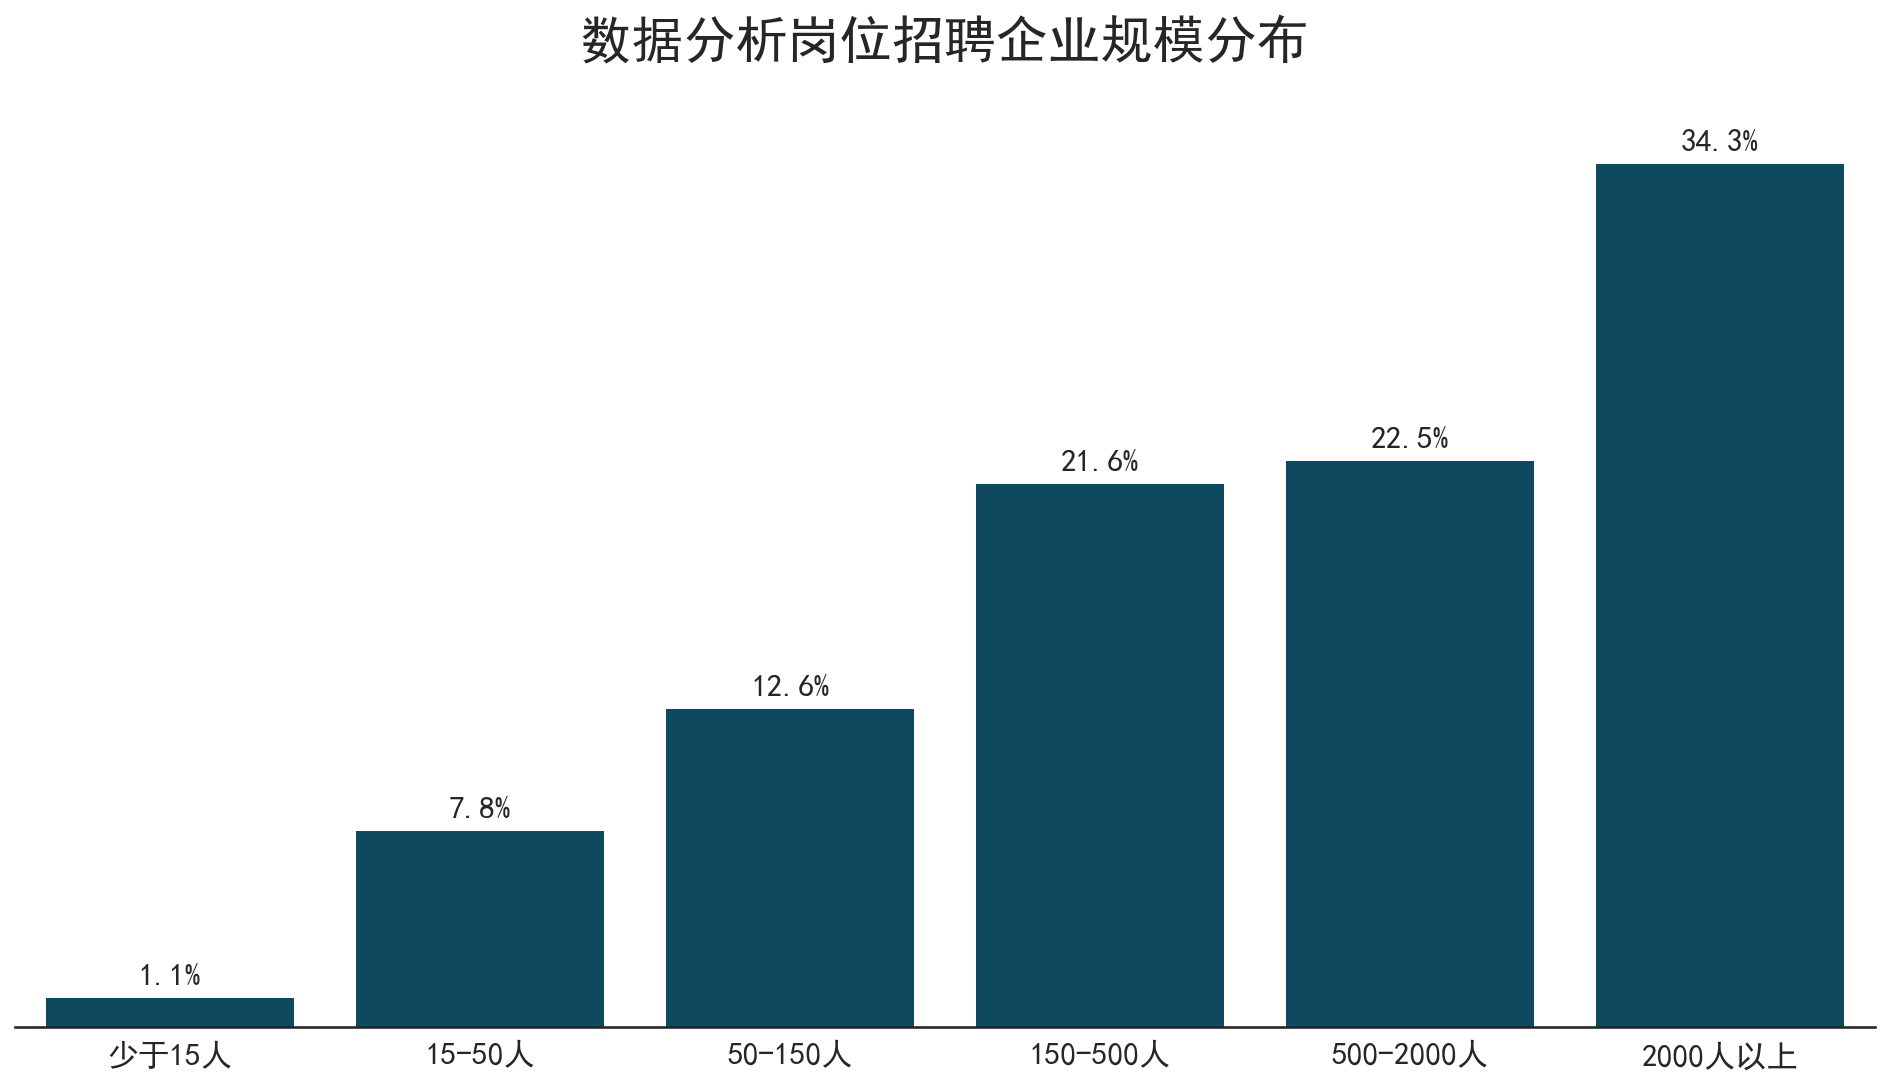

In [11]:
fig = plt.figure(figsize=(16,8),dpi=150)
sns.barplot(companySize_data.index,companySize_data,color='#004f6d')

x = np.arange(len(companySize_data))
y = companySize_data.values
for a,b in zip(x,y):
    plt.text(a, b+10, '{:.1f}%'.format(b/sum(companySize_data)*100), ha='center', va= 'bottom',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.title('数据分析岗位招聘企业规模分布\n',size=25)
sns.despine(left=True)
plt.show()

从招聘企业规模来看，2000以上的企业人才需求占比最多，为34.3%，其次是500-2000人规模企业，占到了22.5%，150-500人规模企业的人才需求占比为21.6%。

#### 1.5 数据分析岗位学历要求分布

In [12]:
education_data =df.groupby('education')['positionId'].count().reindex([ '不限','大专','本科', '硕士', '博士'])

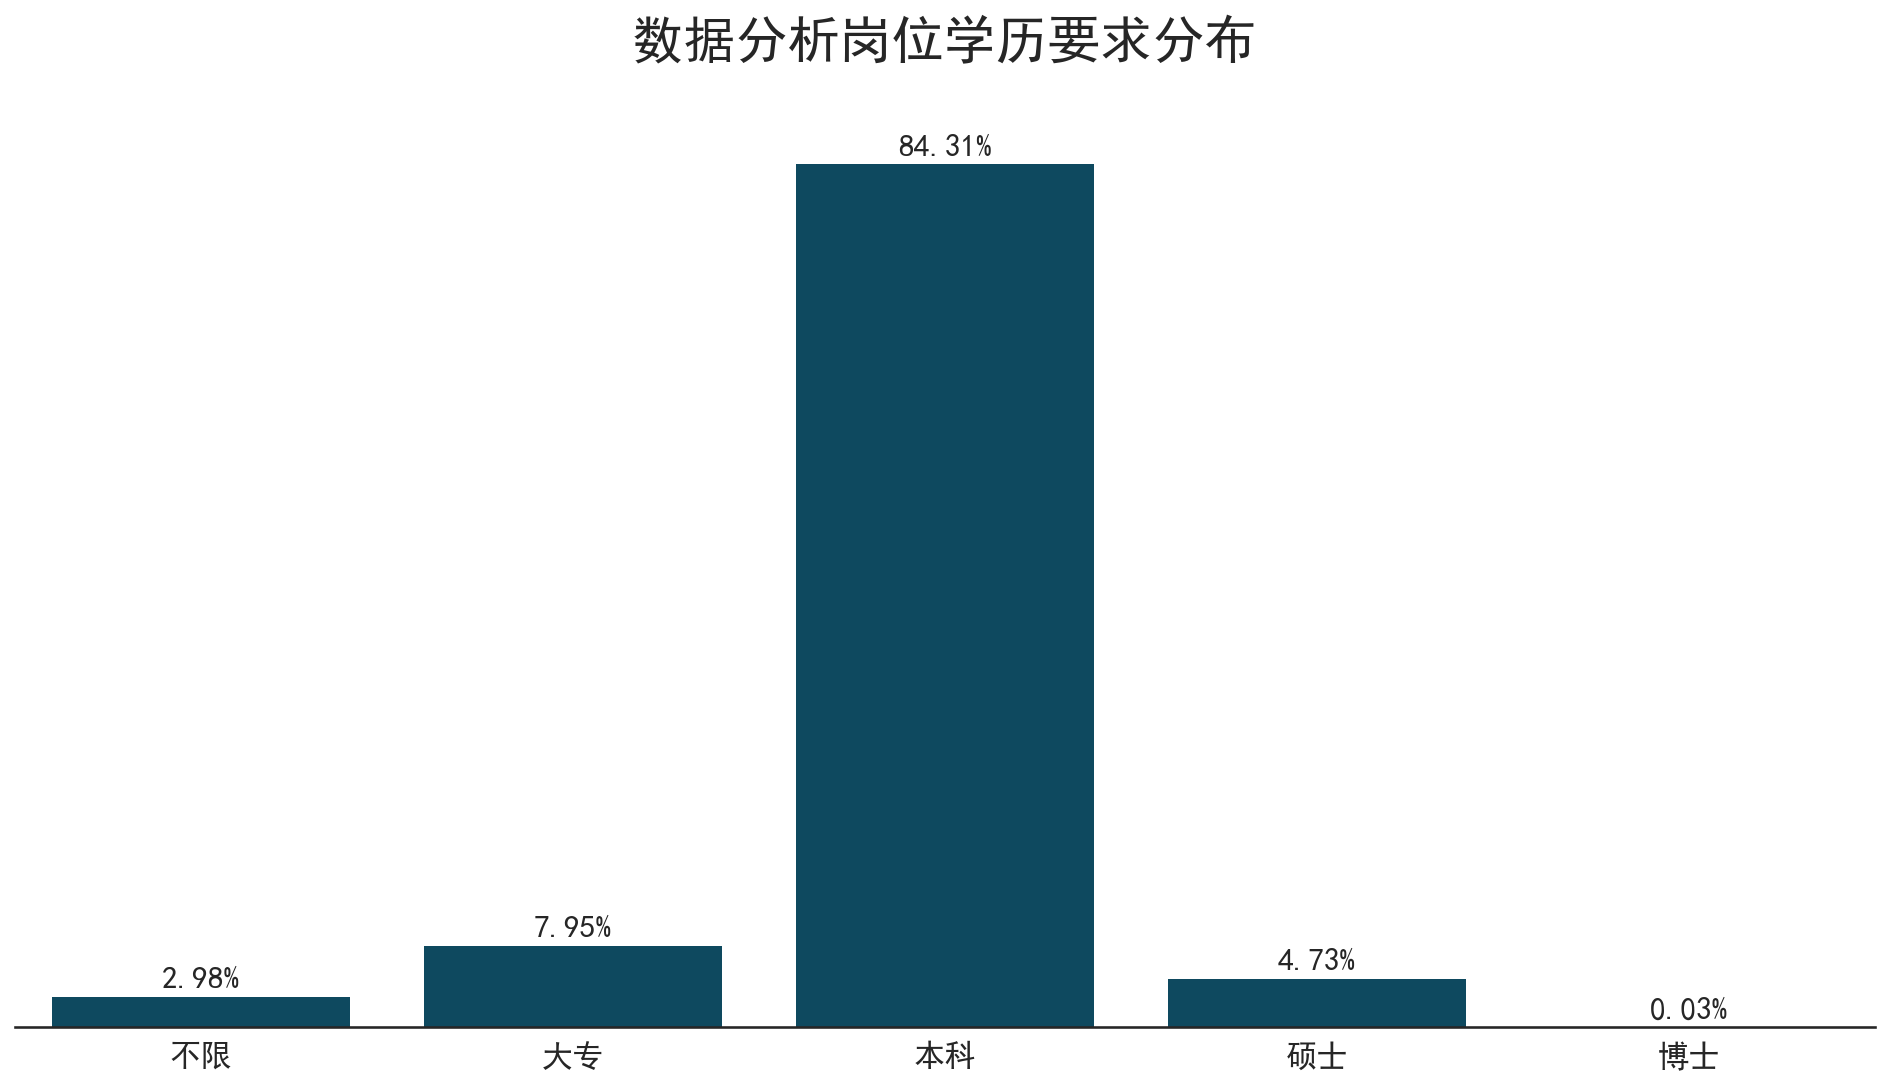

In [13]:
fig = plt.figure(figsize=(16,8),dpi=150)
sns.barplot(education_data.index,education_data,color='#004f6d')
x = np.arange(len(education_data))
y = education_data.values
for a,b in zip(x,y):
    plt.text(a, b+10, '{:.2f}%'.format(b/sum(education_data)*100), ha='center', va= 'bottom',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.title('数据分析岗位学历要求分布\n',size=25)
sns.despine(left=True)
plt.show()

从学历要求来看，84.31%的岗位只需要本科学历即可。

#### 1.6 数据分析岗位工作经验要求分布

In [14]:
df_year = df.groupby('workYear')['positionId'].count()
df_year = df_year.reindex(['应届毕业生','1年以下','1-3年',  '3-5年', '5-10年', '不限'])

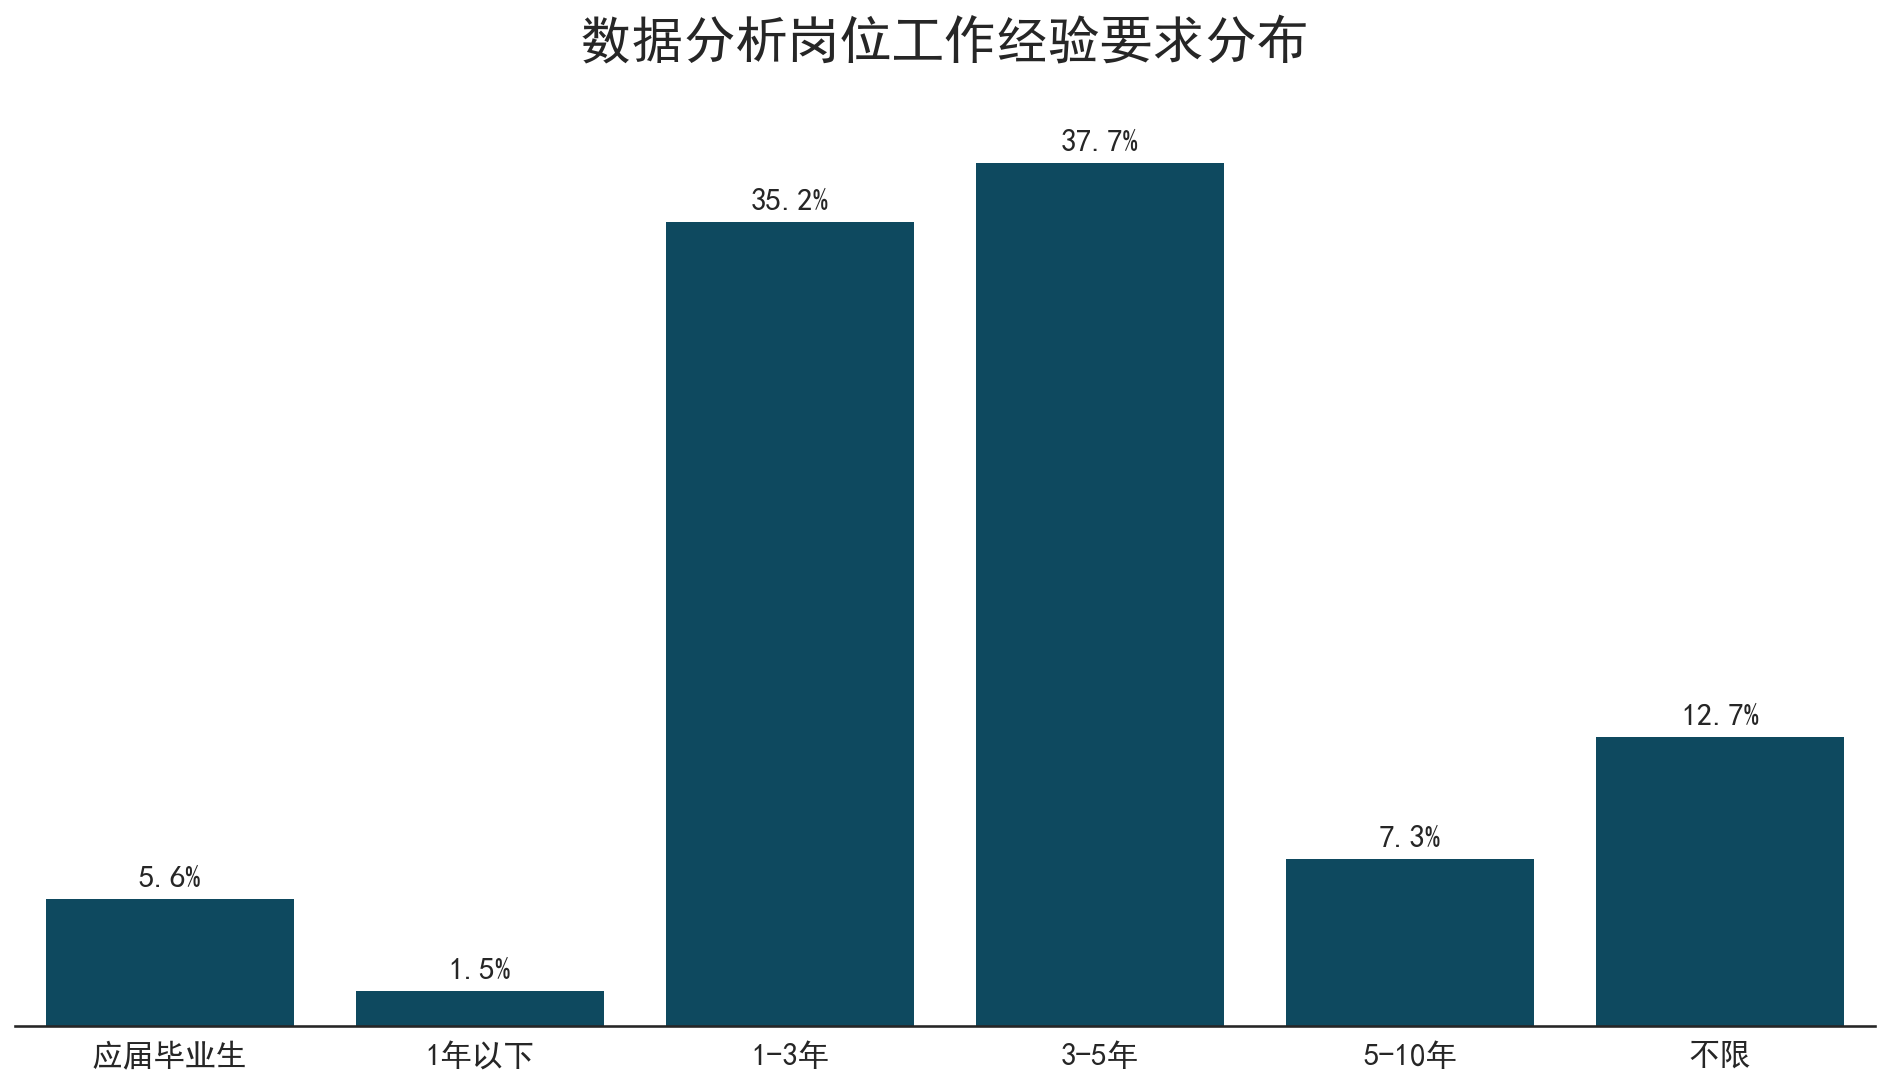

In [15]:
fig = plt.figure(figsize=(16,8),dpi=150)
sns.barplot(x=df_year.index,y=df_year,color='#004f6d')
x = np.arange(len(df_year))
y = df_year.values
for a,b in zip(x,y):
    plt.text(a, b+10, '{:.1f}%'.format(b/sum(df_year)*100), ha='center', va= 'bottom',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([],fontsize=15)
plt.xlabel('')
plt.ylabel('')
plt.title('数据分析岗位工作经验要求分布\n',fontsize=25)
sns.despine(left=True)
plt.show()

从工作经验要求来看，要求求职者具备1-3和3-5年工作经验的岗位需求量最大，占比分别达37.7%和35.2%，对5-10年经验的人才也有一定的需求，可见，企业对具备一定工作经验，能够独立胜任工作或者具备带团队工作的人才非常需要，但同时可以发现企业对应届、1年以下以及不限工作经验的人才需求高达27%，这也表明该行业对人才具有一定的缺口。

#### 1.7 技能需求

In [16]:
syn = dict()
with open('synonyms.txt','r')as f:
    for line in f:
        for word in line.strip('\n').split(' ')[1:]:
            syn[word] = line.strip('\n').split(' ')[0]
#关键词列表
def get_words(content):
    all_words = []
    rule = re.compile(r'[a-z]+')
    skil_list = rule.findall(str.lower(content))
    for word in skil_list:
        #去除长字符串
        if len(word) < 11:
            if word == 'office':
                all_words.extend(['excel','ppt','word'])
            else:
                if word in syn.keys():
                    word = syn[word]
                all_words.append(word)
    #输出字符串列表
    return all_words
content = ",".join(df['content'])
all_words = get_words(content)

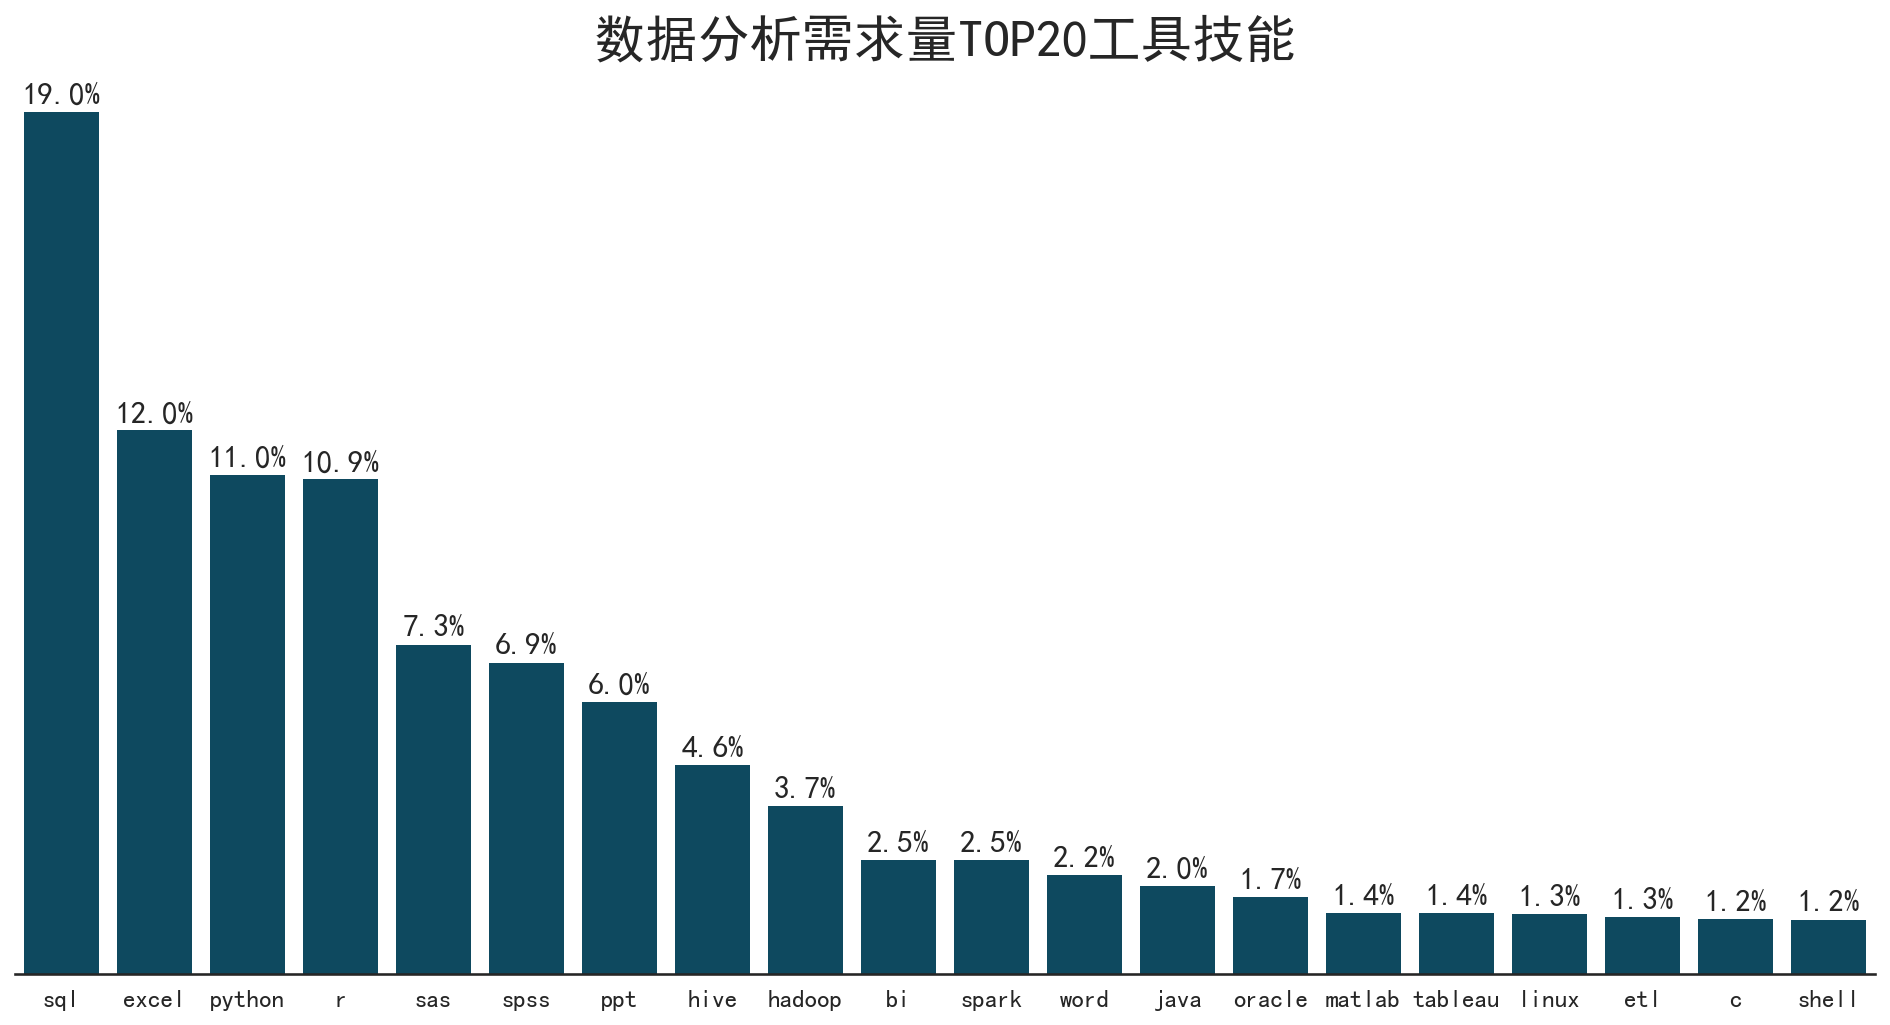

In [17]:
df_skills = pd.DataFrame(all_words, columns=['skill'])
grouped_skill = df_skills.groupby(['skill'])['skill'].count().sort_values(ascending=False)
grouped_skill.drop(['kpi','o','www','com','app','ishumei','a','it'], inplace=True)

fig = plt.figure(figsize=(16,8),dpi=150)
sns.barplot(grouped_skill[:20].index,grouped_skill[:20],color='#004f6d')
x = np.arange(len(grouped_skill[:20]))
y = grouped_skill[:20].values
for a,b in zip(x,y):
    plt.text(a, b+10, '{:.1f}%'.format(b/sum(grouped_skill[:20])*100), ha='center', va= 'bottom',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.title('数据分析需求量TOP20工具技能',fontsize=25)
sns.despine(left=True)
plt.show()


从技能需求来看，企业对求职者掌握数据库查询语言sql需求最高，其次为数据处理分析工具excel，python和r，sas、spss稍落其后，接下来是用来撰写分析报告的ppt，以及处理大数据的hive和hadoop。当然这些技能不能独立来看，掌握多项工具使用技能，构造数据分析生态闭环，是良好的职业发展助力。


#### 1.8 结论

通过以上分析，我们可以得出以下结论:

1.从企业所处行业来看，金融、数据服务、电子商务、O2O是需求量最大的行业，占比超过60%；

2.招聘主要分布在北上广深杭这五座城市，占比近90%；  

3.绝大多数为上市和不需要融资企业，占比分别达到20.5%和23.7%；  

4.招聘企业主要以中大型企业为主，150人以上企业占比高大78%； 

5.本科学历能够满足市场上绝大多数岗位要求，占比达84%；  

6.招聘岗位比较看重求职者工作经验：要求求职者具备3-5年和1-3年工作经验的岗位达到72%；但是对1年以下工作经验的人员也有一定需求，占比达到27%；  

7.大多数企业对求职者工具技能主要需求为sql、excel、python、r，占比达50%。  

### 2 薪酬分析

#### 2.1 数据分析岗位平均招聘月薪分布

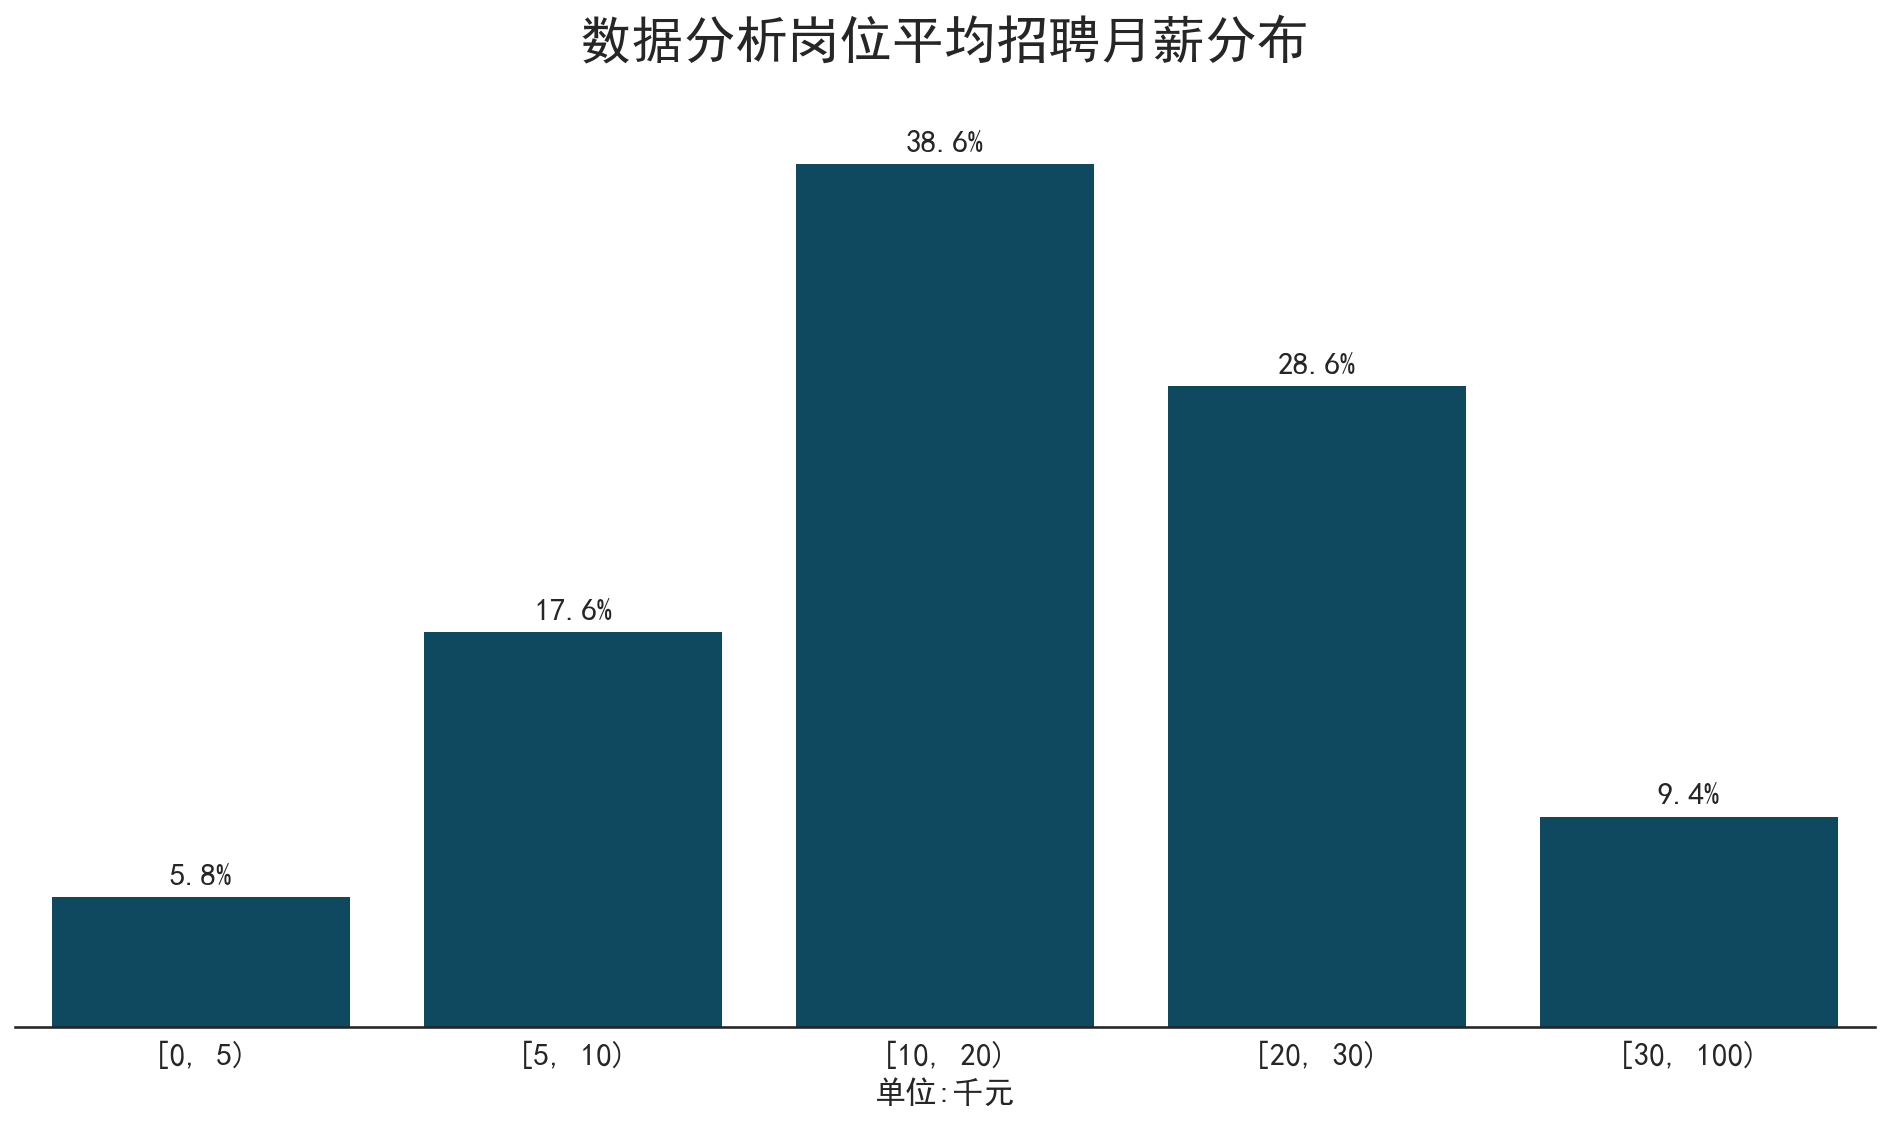

In [18]:
avgSalarys = list(df['avgSalary'])
avgSalarys
bins = [0,5,10,20,30,100]
cats = pd.cut(avgSalarys,bins,right=False)
salary_data = pd.value_counts(cats)
salary_data = salary_data.sort_index()
fig = plt.figure(figsize=(16,8),dpi=150)

#xticks = salary_data.index
sns.barplot(salary_data.index,salary_data,color='#004f6d')
x= np.arange(len(salary_data))
y = salary_data.values
for a,b in zip(x,y):
    plt.text(a, b+10, '{:.1f}%'.format(b/sum(salary_data)*100), ha='center', va= 'bottom',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([],fontsize=15)
plt.xlabel('单位:千元',fontsize=15)
plt.ylabel('')
plt.title('数据分析岗位平均招聘月薪分布\n',size=25)
sns.despine(left=True)
plt.show()

从薪资分布来看，平均月薪在10k-20k范围的占比最大，达38.6%，需要说明的是，拉勾网职位薪值是企业自由填写的区间值，为了便于分析，取区间的平均值作为薪资参照标准。

#### 2.2 数据分析岗位需求量TOP10城市薪资分布

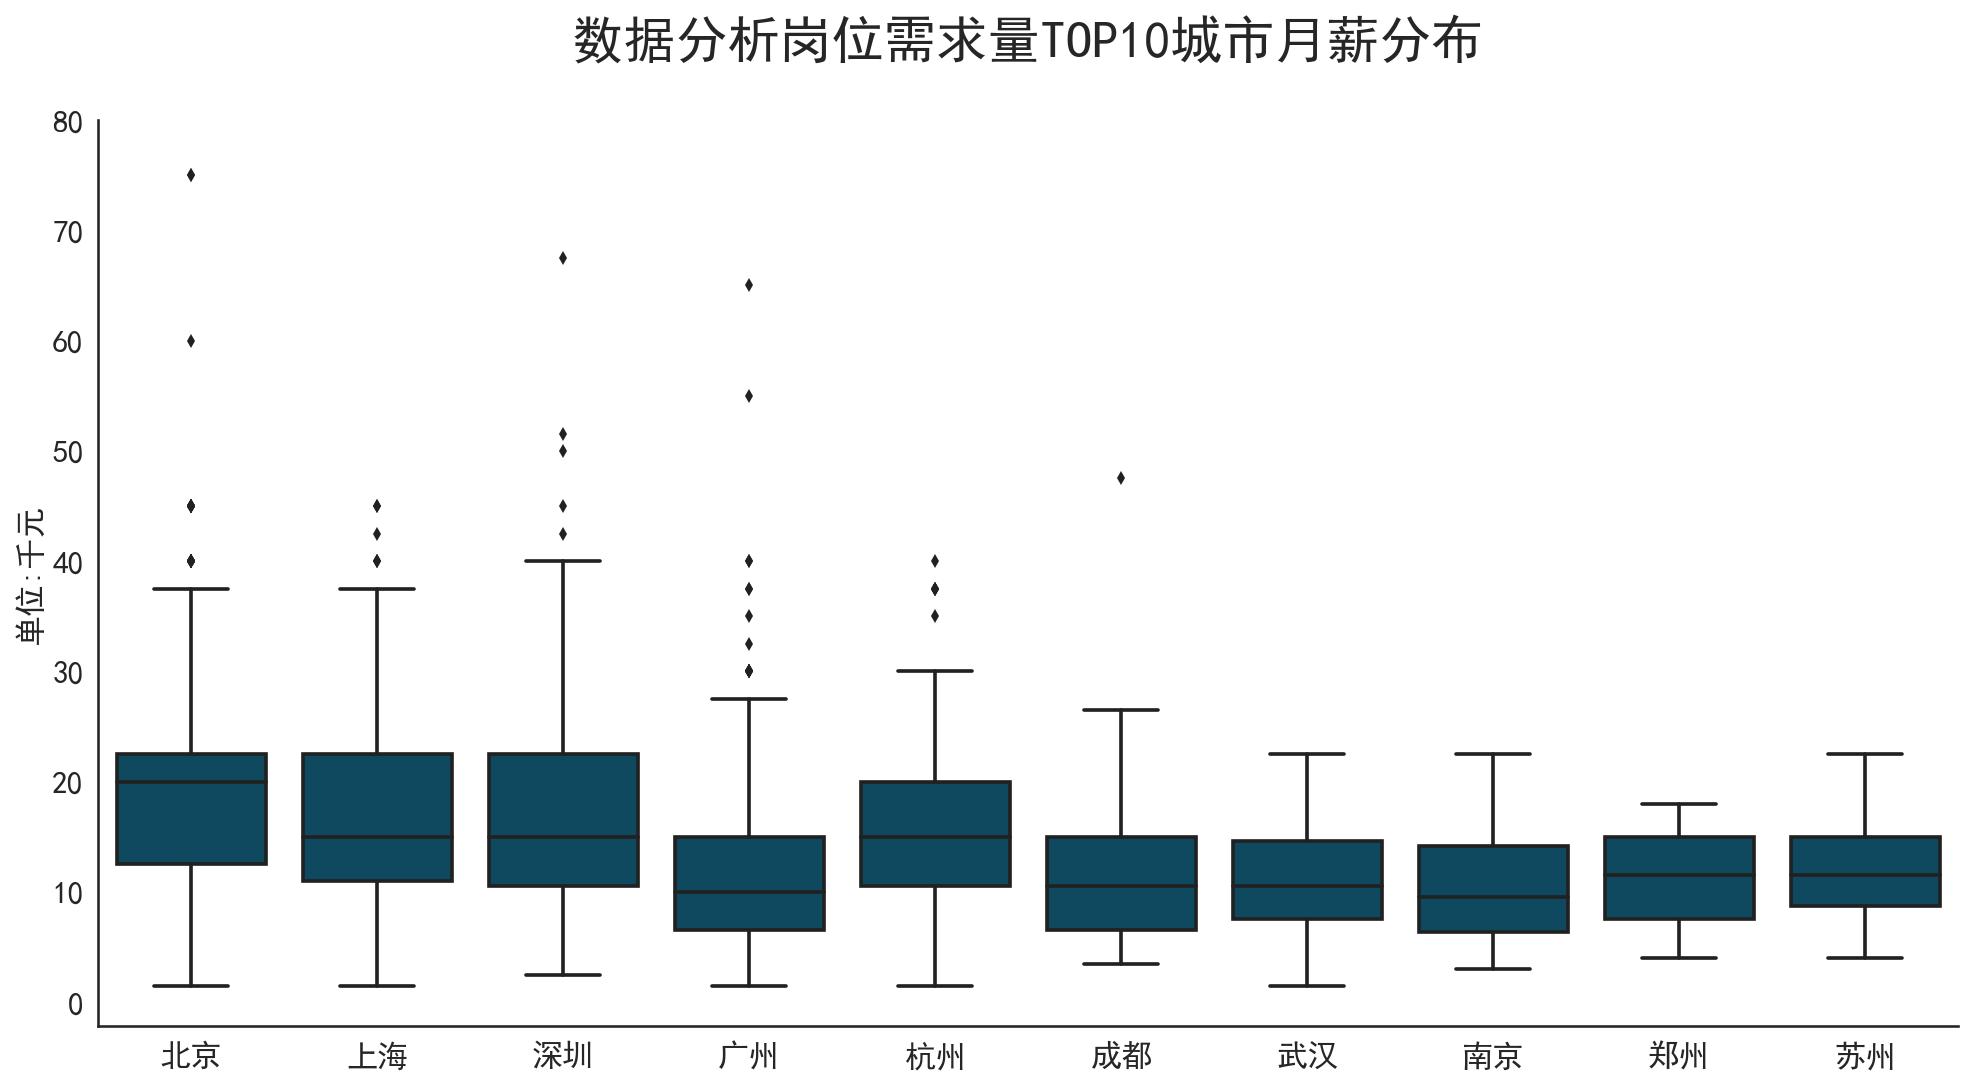

In [19]:
fig = plt.figure(figsize=(16,8),dpi=150)
sns.boxplot(x='city',y='avgSalary',data=df,order=top10,color='#004f6d')
plt.xticks(fontsize=15)
plt.yticks(range(0,90,10),fontsize=15)
plt.xlabel('')
plt.ylabel('单位:千元',fontsize=15)
plt.title('数据分析岗位需求量TOP10城市月薪分布\n',fontsize=25)
sns.despine()
plt.show()

从地区上来看，全国岗位薪酬大体可分为三个梯队，北京凭借区位优势和互联网创业中心地位，月薪中位数远超其他城市，近2万元，独自占据第一梯队。上海、深圳、杭州月薪中位数均在1.5万元，位于第二梯队，剩余城市组成第三梯队。

#### 2.3 数据分析岗位不同工作经验的薪酬分布

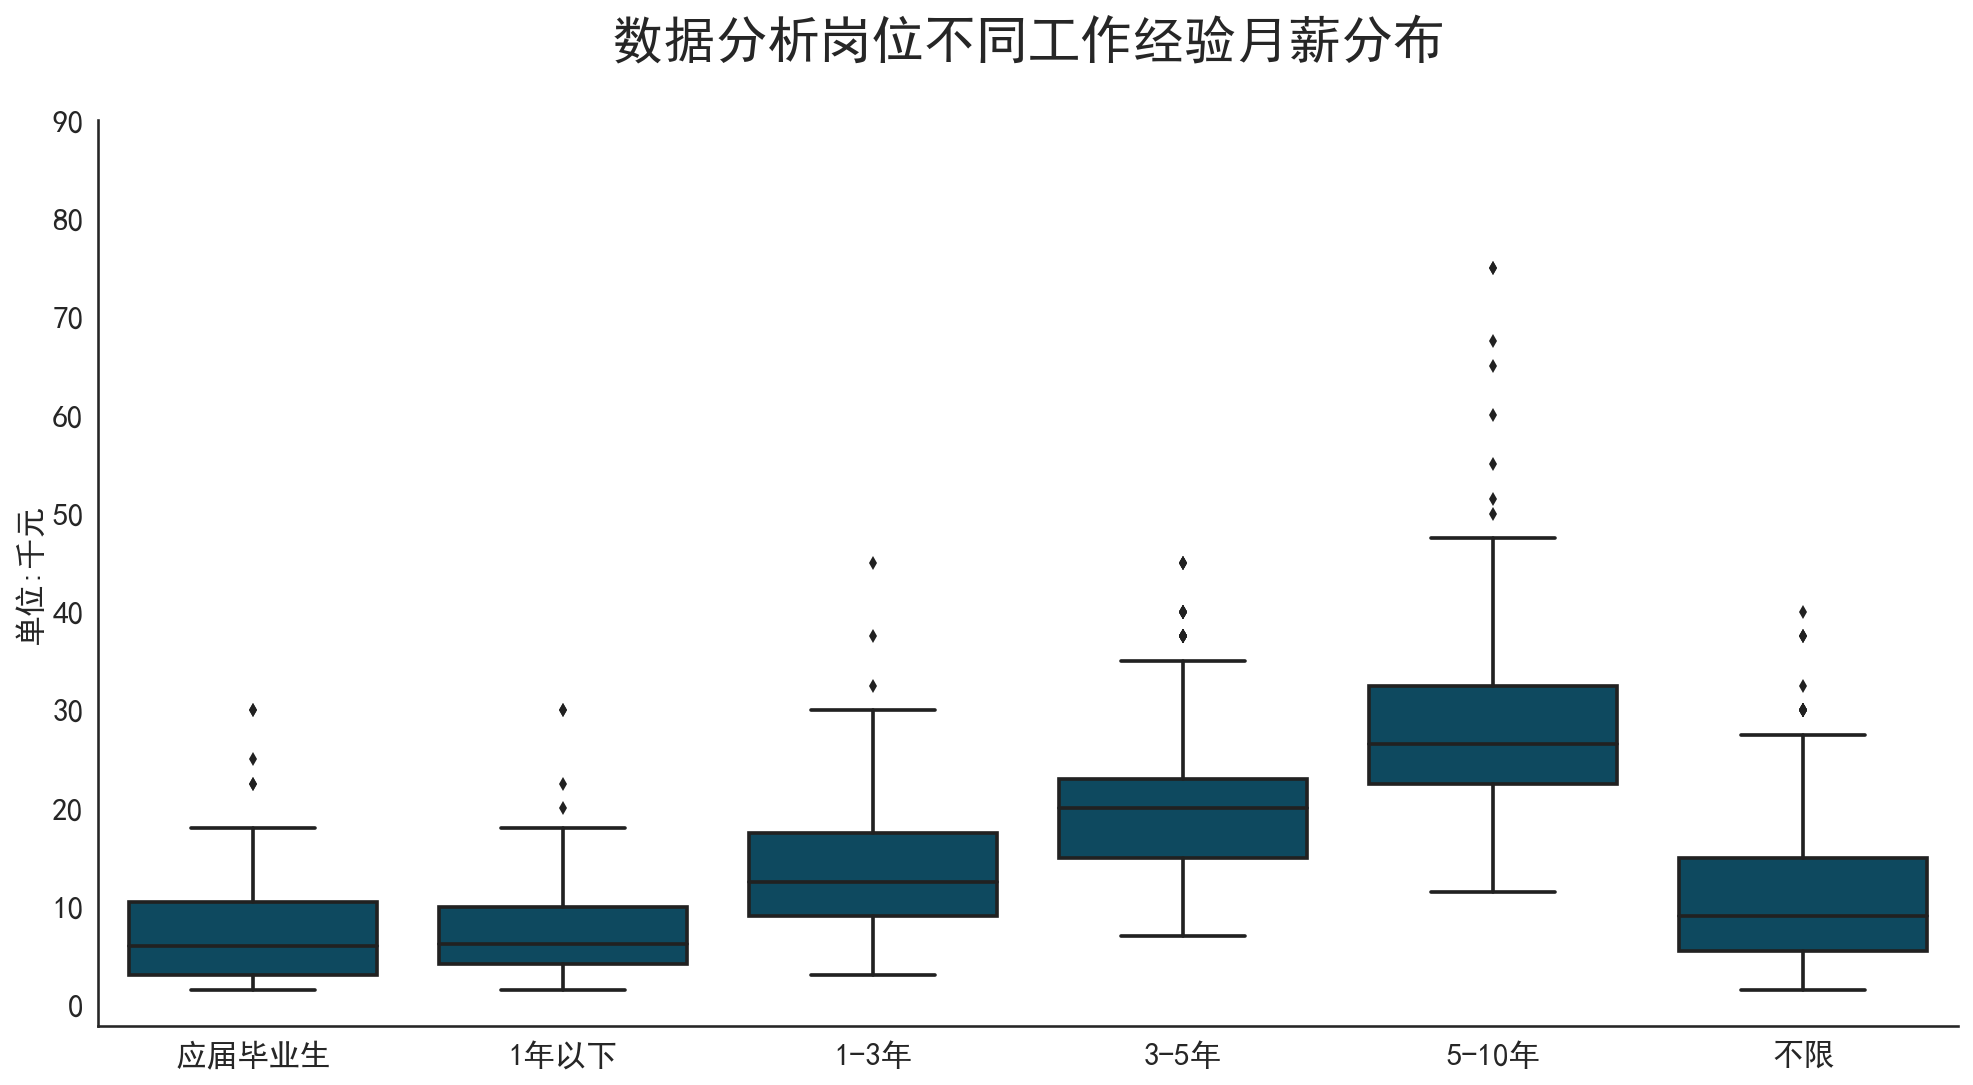

In [20]:
fig = plt.figure(figsize=(16,8),dpi=150)
sns.boxplot(x='workYear',y='avgSalary',data=df,order=[ '应届毕业生','1年以下','1-3年',  '3-5年', '5-10年', '不限'],color='#004f6d')
plt.xticks(fontsize=15)
plt.yticks(range(0,100,10),fontsize=15)
plt.xlabel('')
plt.ylabel('单位:千元',fontsize=15)
plt.title('数据分析岗位不同工作经验月薪分布\n',fontsize=25)
sns.despine()
plt.show()

随着经验的提高，数据分析师的薪酬也在不断提高。

#### 2.4 数据分析岗位不同技能薪资分布

In [21]:
skill_list = list(grouped_skill[0:20].index)
def get_skills(key_words):
    a = list(set(key_words).intersection(set(skill_list)))
    if len(a) != 0:
        return '|'.join(a)
df['key_words'] = df['content'].apply(get_words)
df['skills'] = df['key_words'].apply(get_skills)
df_skills = df.dropna(subset=['skills']).reset_index(drop=True)
dummies = pd.DataFrame(np.zeros((len(df_skills ),len(skill_list))),columns=skill_list)
for i,skill in enumerate(df_skills['skills']):
    dummies.ix[i,skill.split('|')] = 1
df_skills_dum = df_skills.join(dummies)
df_skill_salary = pd.DataFrame()
for i in skill_list:
    df1 = pd.Series()
    df1['avgSalary'] = df_skills_dum.groupby(i)['avgSalary'].mean()[1]
    df1['count'] = df_skills_dum.groupby(i)['avgSalary'].count()[1] 
    df_skill_salary = df_skill_salary.append(pd.DataFrame(df1,columns=[i]).T)
df_skill_salary = df_skill_salary.sort_values('count',ascending=False)

C:\Users\Weizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


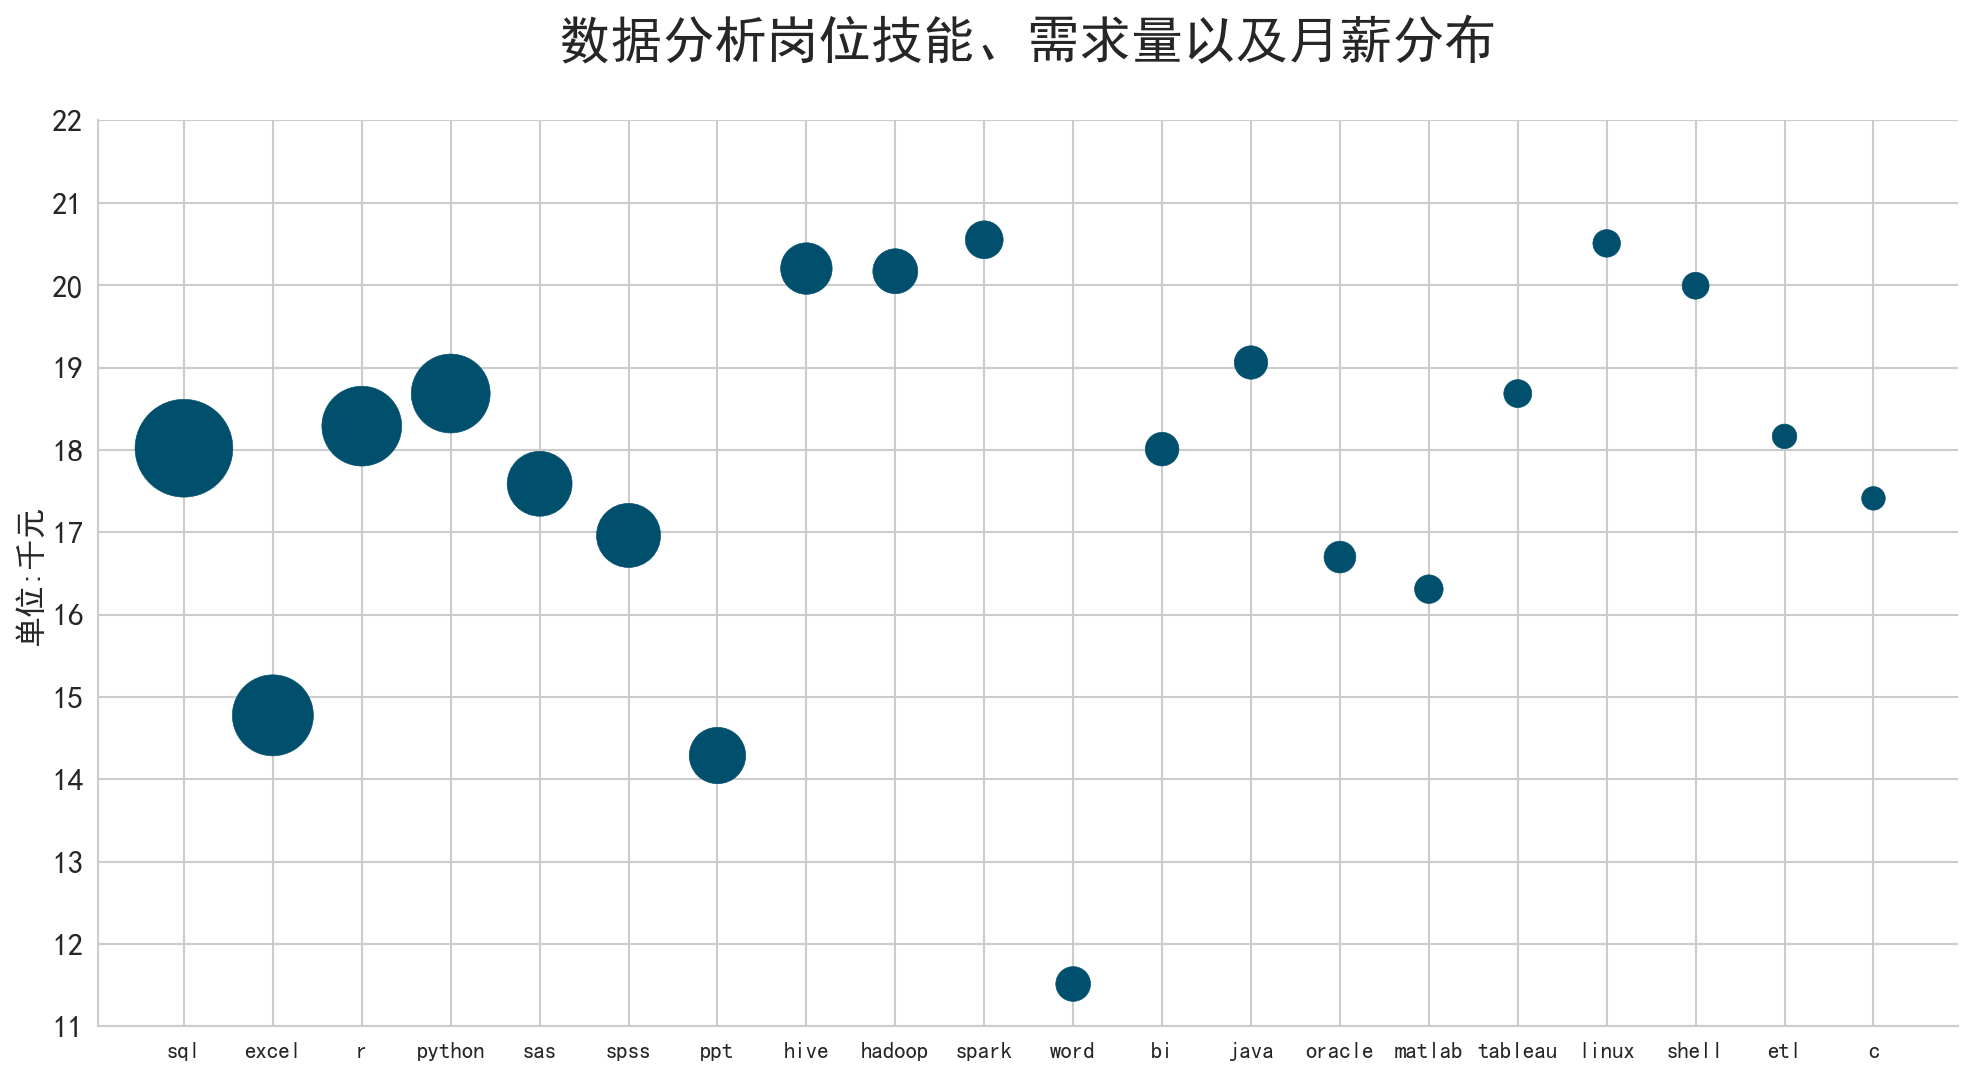

In [22]:
sns.set_style("whitegrid")
plt.rc('font', family='SimHei', size=10)
fig = plt.figure(figsize=(16,8),dpi=150)
plt.scatter(x = range(len(skill_list)), y = df_skill_salary['avgSalary'],s=df_skill_salary['count']*1.2,color='#004f6d')
plt.title('数据分析岗位技能、需求量以及月薪分布\n',fontsize=25)
plt.xlabel('')
plt.ylabel('单位:千元',fontsize=15)
plt.xticks(range(20),df_skill_salary.index, fontsize=11)
plt.yticks(range(11,23),fontsize=15)
plt.xlim()
sns.despine()
plt.show()

从技能工具月薪来看，hive，hadoop，spark，linux，shell这类侧重于海量数据处理的工具语言月薪最高。可以作为很好的职业发展方向。

#### 2.5 结论

通过上面的分析，我们可以得到的结论有这些：

1.总体薪资待遇偏高：主要集中在[10,20)、[20,30)区间范围内，占比达到67%；

2.从待遇上看，北上深杭薪资水平高于其他城市；

3.随着经验的提高，数据分析师的薪酬也在不断提高。


### 3 词云探索

#### 3.1 岗位职责

In [23]:
#动名词分词
def getwords(content):
    content = ",".join(content)
    reObj = re.compile(u'[^\u4e00-\u9fa5]')  # 中文的编码范围是：\u4e00到\u9fa5  
    outStr = "，".join(reObj.split(content))  
    n_list = []
    v_list = []
    words =pseg.cut(outStr)
    for w in words:
        if w.flag in ['v']:
            v_list.append(w.word)
        elif w.flag == 'n':
            n_list.append(w.word)
    return ','.join(n_list),','.join(v_list)

In [24]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1,10)

In [25]:
font = r'C:\Windows\Fonts\simfang.ttf'
with open('stopwords.txt') as f:
    stopwords  = [line.strip() for line in f.readlines()]
def wordcloud(wc_text,max_words=50):
    wc = WordCloud(width =1000, height = 500,background_color = 'white',font_path=font,max_words=max_words,collocations=False,stopwords=stopwords).generate(wc_text)
    fig = plt.figure(figsize=(10,5),dpi=150)
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
    plt.axis("off")
    plt.show()

In [26]:
df1 = df[df['content'].str.contains('要求')]

In [27]:
df1['jobDuty'] = df1['content'].apply(lambda x :x.split('要求')[0])
df1['jobRequire'] = df1['content'].apply(lambda x :x.split('要求')[1])

C:\Users\Weizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Weizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
jobDuty_n,jobDuty_v = getwords(df1['jobDuty'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Weizh\AppData\Local\Temp\jieba.cache
Loading model cost 1.017 seconds.
Prefix dict has been built succesfully.


#### 1）岗位职责名词词云

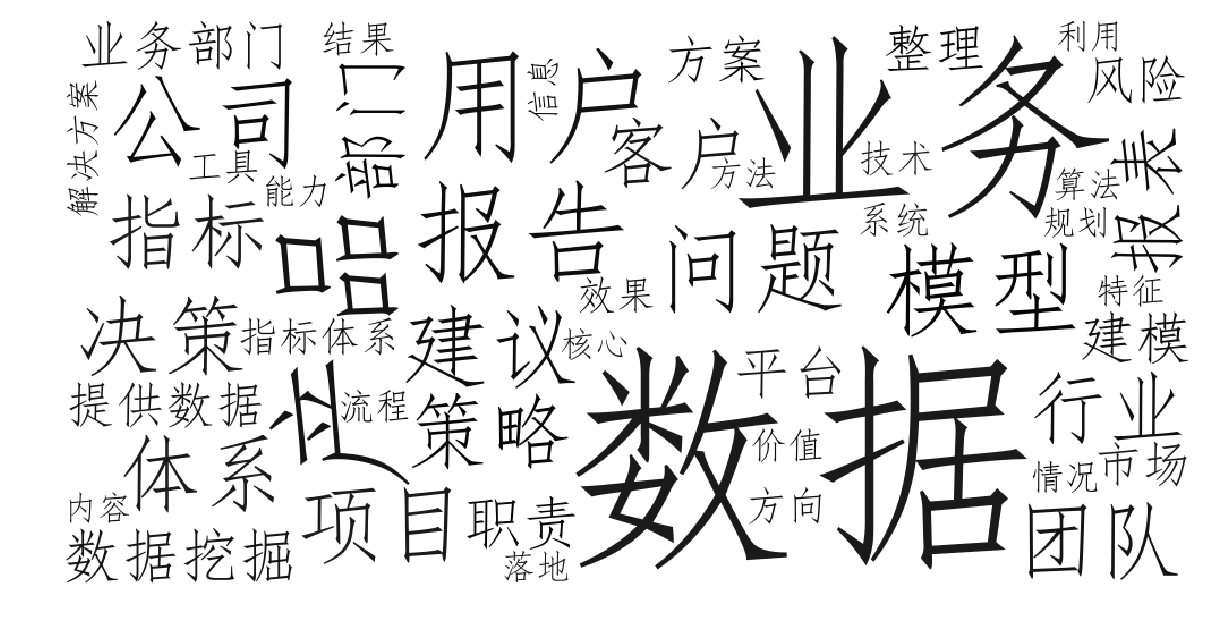

In [29]:
wordcloud(jobDuty_n)

#### 2）岗位职责动词词云

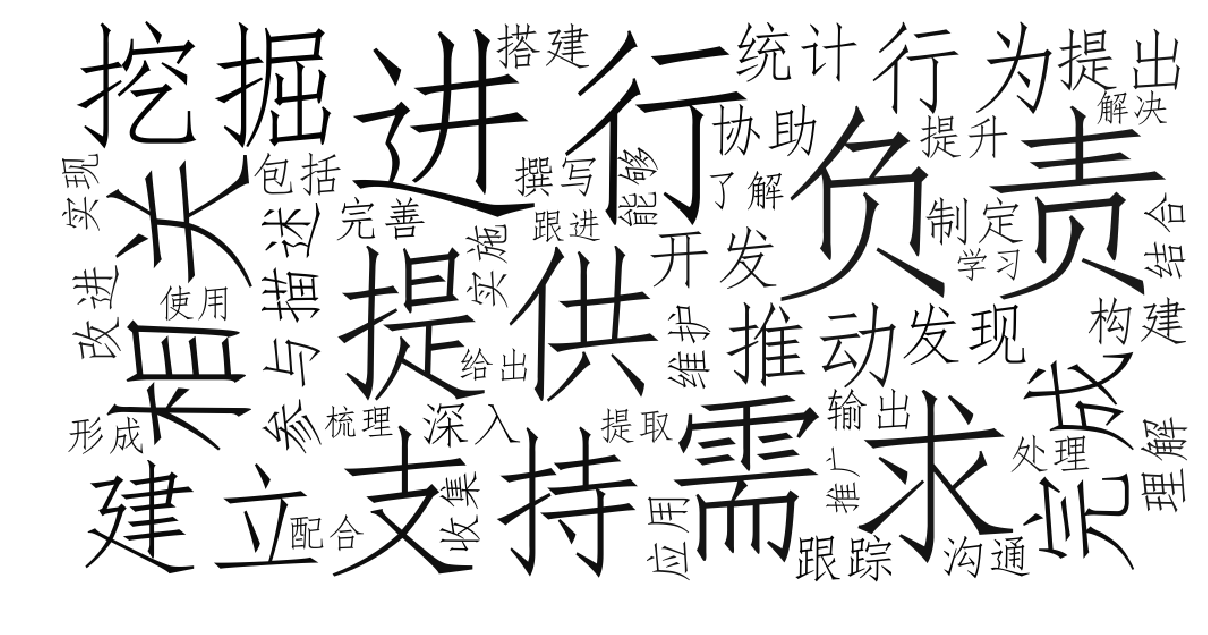

In [30]:
wordcloud(jobDuty_v)

结合词云来看的话，我们可以初步得出数据分析岗位的大致工作内容：

从需求出发，结合对业务的理解，使用相关软件，对数据进行分析和挖掘，采用报表、分析报告等形式，以达到发现运营和管理过程中的不足，发现趋势，并给相关部门的决策行为提供数据支持。

#### 3.2 任职要求

In [31]:
jobRequire_n,jobRequire_v = getwords(df1['jobRequire'])

#### 1）任职要求名词词云

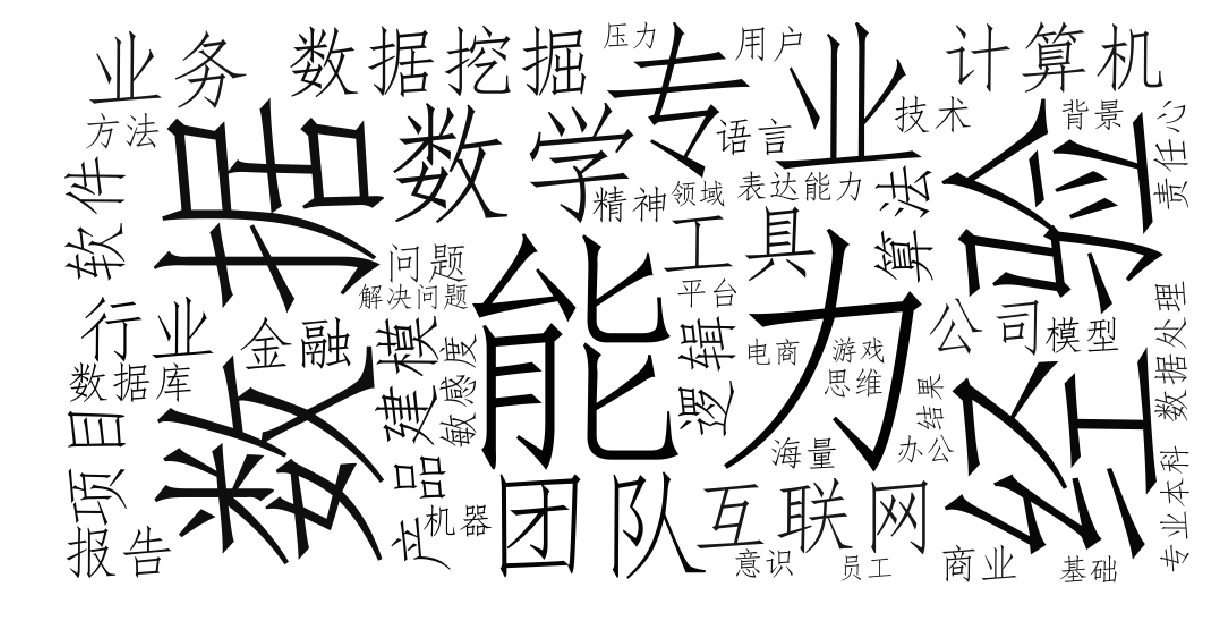

In [32]:
wordcloud(jobRequire_n)

#### 2）任职要求动词词云

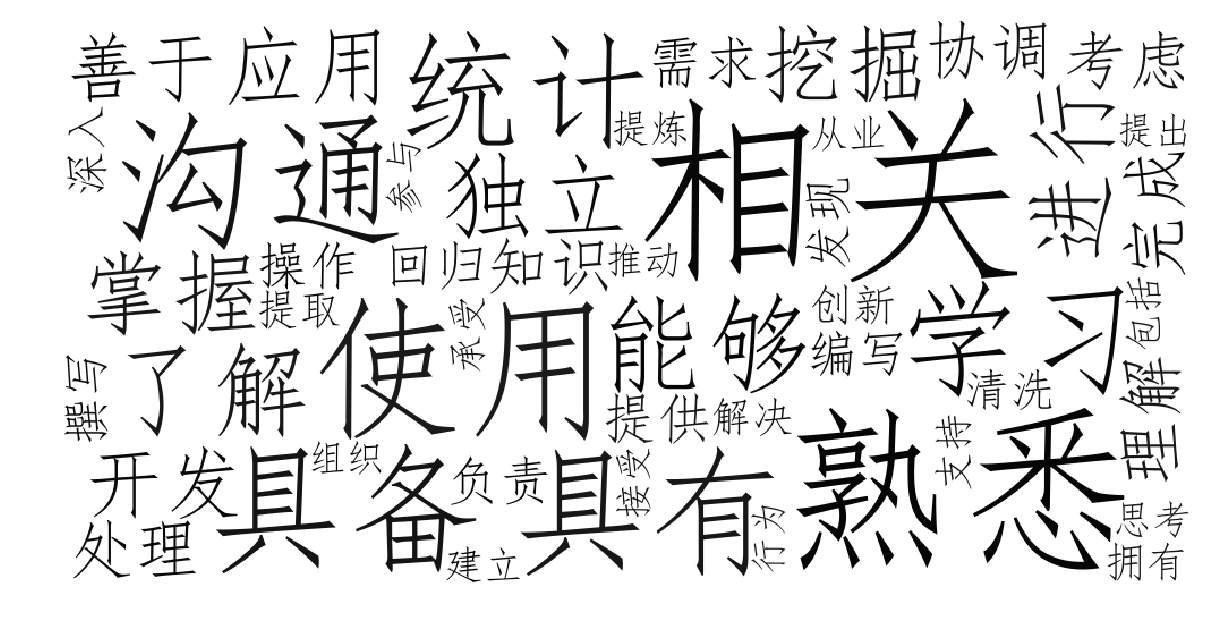

In [33]:
wordcloud(jobRequire_v)

结合词云来看的话，可以得出大致的任职要求：

企业普遍重视求职者的工作经验、相关专业等背景；要求求职者具备良好的数学基础和熟练的工具使用能力；良好的数据敏感性，较强的沟通能力、逻辑分析能力和学习能力等软技能。

## 总结与思考


此次对于数据分析岗位的分析过程是比较浅略的，仅仅对部分信息进行简单的统计描述。而且如果能够获取更多的数据信息，相信统计结果会更加详细可靠，也能够对行业的发展趋势做出分析。下一步可以固定间隔时间爬取相关数据，进行多维度的交叉对比，这都是后续可以改进的方向。